In [1]:
#set project path from config.yaml
import pathlib
import yaml

with open("config.yaml", "r") as f:
   config = yaml.safe_load(f)

project_root = pathlib.Path(config["project"]["root_path"])

print("Current project path: ", project_root)

Current project path:  D:\Data Repositories\Coughvid


In [2]:
dset_wav_dir = project_root / "audio_wav_fulldset"
labels_dir = project_root / "labels_json"

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from collections import Counter  # Optimized for counting unique items

# 1. Initialize an empty Counter
status_counts = Counter()

# 2. Get file list for tqdm progress bar
# Create a set of filenames (without extensions) from the wav directory for fast lookup
existing_wav_stems = {f.stem for f in dset_wav_dir.glob("*.wav")}

# Filter json_files to only include those with a matching .wav file
json_files = [f for f in labels_dir.glob("*.json") if f.stem in existing_wav_stems]

for json_file in tqdm(json_files, desc="Analyzing statuses", unit="file"):
    try:
        with open(json_file, "r") as f:
            data = json.load(f)
            # Retrieve value; default to "null" if key is missing or value is None
            status = data.get("status")
            
            if status is None:
                status_counts["null"] += 1
            else:
                # This will dynamically count every unique string found
                status_counts[status] += 1
                
    except Exception as e:
        print(f"Error reading {json_file.name}: {e}")

# 3. Convert Counter to DataFrame
# .items() gives us (key, value) pairs
df = pd.DataFrame(status_counts.items(), columns=["Status", "Count"])

# 4. Sort by Count (descending) so the bar graph looks organized
df = df.sort_values(by="Count", ascending=False)

Analyzing statuses: 100%|██████████| 20664/20664 [00:02<00:00, 9190.12file/s]


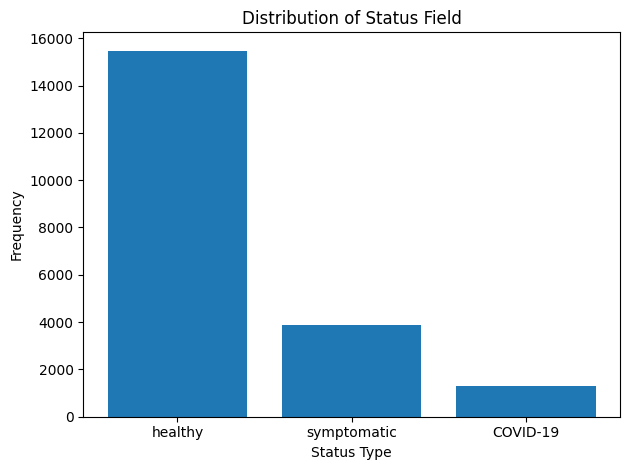

In [4]:
# 5. Plot the values on a bar graph
plt.bar(df["Status"], df["Count"])
plt.xlabel("Status Type")
plt.ylabel("Frequency")
plt.title("Distribution of Status Field")
plt.tight_layout()